In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv")

df  # mostramos los primeros datos


zsh:1: command not found: wget


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


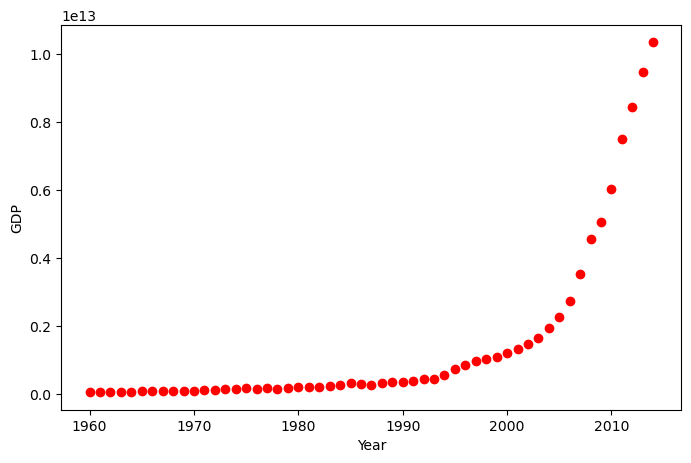

In [15]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

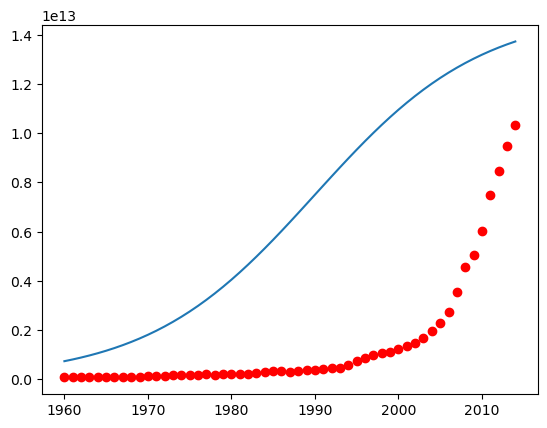

In [ ]:
#define el modelo
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y
# SE USA ESTA FUNCION YA QUE LA POBLACION. DE CHINA SIGUE UNA CURVA LOGISTICA EN FORMA DE S

#ejecutamos un primer modelo
beta_1 = 0.10
beta_2 = 1990.0
beta_3 = 1.1
#función logística
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#predicción de puntos
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [10]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#imprimir los parámetros finales
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))
# ACA SE DESCUBREN LAS BETAS QUE VAN A AJUSTAR LA CURVA

 beta_1 = 690.453017, beta_2 = 0.997207


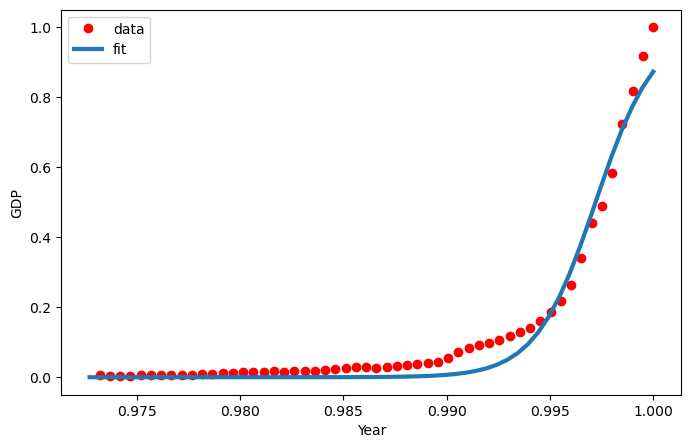

In [17]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [18]:
# divide los datos en entrenamiento y prueba
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# construye el modelo utilizando el set de entrenamiento
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predecir utilizando el set de prueba
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Promedio de error absoluto: %.5f" % np.mean(np.absolute(y_hat - test_y)))
print("Suma residual de cuadrados (MSE): %.5f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.5f" % r2_score(y_hat , test_y) )

Promedio de error absoluto: 0.25997
Suma residual de cuadrados (MSE): 0.17649
R2-score: -48836668687084230274229406084890624.00000


/var/folders/fy/60bqycgj6lv4hqpj9smr9f880000gn/T/ipykernel_39203/3701796329.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(sigmoid, train_x, train_y)
